# Assess whether the model is spun up

In [4]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy.stats as scs
from datetime import date
import matplotlib

%matplotlib inline

##### Parameters:

In [5]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

isize = imax - imin
jsize = jmax - jmin

year  = 2002
month = 8

stn_i = np.array([104-1, 100, 91, 175, 175, 233, 214, 352, 242, 458, 508, 547, 629])
stn_j = np.array([370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457, 471])

In [6]:
initial   = '/data/brogalla/IC/Mn_ini_20180716.nc'
folder    = '/data/brogalla/run_storage/'
subfolder = 'Mn-spm-202103/' # 'Mn-reference-202103/' #'Mn-clean-ice-202103/'
end       = '-spm-202103/' #'-202103/' #'-clean-ice-202103/'
end_yr1 = folder+subfolder+'spin-up0'+end
end_yr2 = folder+subfolder+'spin-up1'+end
end_yr3 = folder+subfolder+'spin-up2'+end
end_yr4 = folder+subfolder+'spin-up3'+end
end_yr5 = folder+subfolder+'spin-up4'+end
end_yr6 = folder+subfolder+'spin-up5'+end
end_yr7 = folder+subfolder+'spin-up6'+end
end_yr8 = folder+subfolder+'spin-up7'+end
monthly =  'ANHA12_EXH006_2002_monthly.nc'

In [7]:
colors = ['#f9ddd8', '#f2ac9f', '#ea7a65', '#e5593f', '#a03e2c', \
          '#e0dfea', '#b1b0cc', '#646199', '#46436b', \
          '#3d6977', '#5b9db3', '#84bfd2', '#c1dfe8'] # CB

name   = ['CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9', \
          'CB1', 'CB2', 'CB3', 'CB4']

##### Load files:

In [8]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
tmask = np.array(mask.variables['tmask'])[:,:,:,:]

In [9]:
ref   = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12-EXH006_y2015m01d05_gridT.nc',  'r')
depth = np.array(ref.variables['deptht'])

##### Calculations:

In [10]:
mn_m0     = nc.Dataset(initial)
mn_m1     = nc.Dataset(end_yr1 + monthly)
mn_m2     = nc.Dataset(end_yr2 + monthly)
mn_m3     = nc.Dataset(end_yr3 + monthly)
mn_m4     = nc.Dataset(end_yr4 + monthly)
mn_m5     = nc.Dataset(end_yr5 + monthly)
mn_m6     = nc.Dataset(end_yr6 + monthly)
mn_m7     = nc.Dataset(end_yr7 + monthly)
mn_m8     = nc.Dataset(end_yr8 + monthly)

In [11]:
mn_month1 = np.array(mn_m1.variables['dissolmn'][:,0,:,:,:])
mn_month2 = np.array(mn_m2.variables['dissolmn'][:,0,:,:,:])
mn_month3 = np.array(mn_m3.variables['dissolmn'][:,0,:,:,:])
mn_month4 = np.array(mn_m4.variables['dissolmn'][:,0,:,:,:])
mn_month5 = np.array(mn_m5.variables['dissolmn'][:,0,:,:,:])
mn_month6 = np.array(mn_m6.variables['dissolmn'][:,0,:,:,:])
mn_month7 = np.array(mn_m7.variables['dissolmn'][:,0,:,:,:])
mn_month8 = np.array(mn_m8.variables['dissolmn'][:,0,:,:,:])

The year-to-year change is calculated as the sum over all depths of the concentration at the observed stations, $stn$, for each month from one year compared to the previous year. 

$$ diff_{stn} = \sum^{50}_{z=0} | Mn_{stn}(z,month,yr) - Mn_{stn}(z,month,yr-1) | $$

In [12]:
diff1 = np.array([np.sum(np.abs(mn_month2[:,:,i,j]-mn_month1[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff2 = np.array([np.sum(np.abs(mn_month3[:,:,i,j]-mn_month2[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff3 = np.array([np.sum(np.abs(mn_month4[:,:,i,j]-mn_month3[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff4 = np.array([np.sum(np.abs(mn_month5[:,:,i,j]-mn_month4[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff5 = np.array([np.sum(np.abs(mn_month6[:,:,i,j]-mn_month5[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff6 = np.array([np.sum(np.abs(mn_month7[:,:,i,j]-mn_month6[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])
diff7 = np.array([np.sum(np.abs(mn_month8[:,:,i,j]-mn_month7[:,:,i,j]), axis=1) for i, j in zip(stn_i, stn_j)])

##### Figures:

Reference run:

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


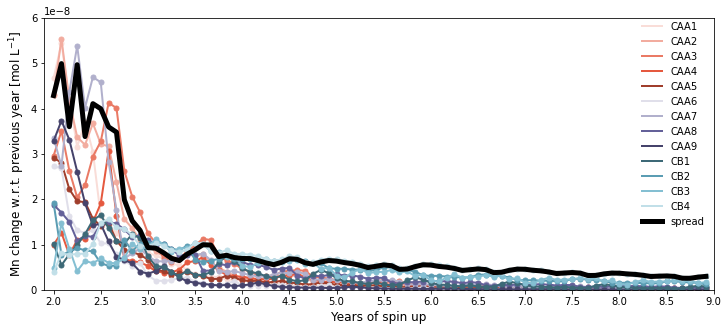

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

nruns  = 7 # number of runs
months = range(12 +1, 12*nruns +1)
years  = np.linspace(2, 2+nruns, nruns*12 + 1)[0:-1]
differences = np.empty((len(name),len(years)))

for stn in range(0,len(name)):
    differences[stn,:] = np.concatenate([diff1[stn,:], diff2[stn,:], diff3[stn,:], diff4[stn,:], \
                                         diff5[stn,:], diff6[stn,:], diff7[stn,:]])
    ax.plot(years, differences[stn,:], c=colors[stn], label=name[stn], linewidth=2)
    ax.plot(years, differences[stn,:], '.', c=colors[stn], markersize=10)
    
# Line for spread in values
ax.plot(years, np.max(differences,axis=0)-np.min(differences,axis=0), '-k', linewidth=5, label='spread')

ax.set_xlim([1.9, 2+nruns])
ax.set_ylim([0, 6.e-8])
ax.xaxis.set_ticks(np.linspace(2,2+nruns, nruns*2 + 1))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('Years of spin up', fontsize=12)
ax.set_ylabel(r'Mn change w.r.t. previous year [mol L$^{-1}$]', fontsize=12)
font = matplotlib.font_manager.FontProperties(family='Helvetica', size=10)
ax.legend(bbox_to_anchor=(0.88, 0.2), frameon=False, prop=font)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A8-spin-up-ref.png', bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A8-spin-up-ref.svg', bbox_inches='tight', dpi=300, \
            format='svg')

Clean sea ice:

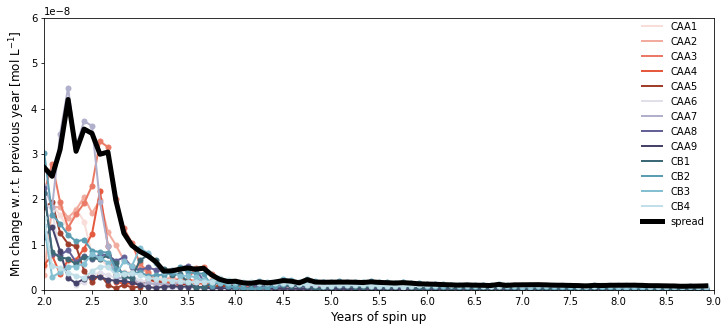

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

nruns  = 7 # number of runs
months = range(12 +1, 12*nruns +1)
years  = np.linspace(2, 2+nruns, nruns*12 + 1)[0:-1]
differences = np.empty((len(name),len(years)))

for stn in range(0,len(name)):
    differences[stn,:] = np.concatenate([diff1[stn,:], diff2[stn,:], diff3[stn,:], diff4[stn,:], \
                                         diff5[stn,:], diff6[stn,:], diff7[stn,:]])
    ax.plot(years, differences[stn,:], c=colors[stn], label=name[stn], linewidth=2)
    ax.plot(years, differences[stn,:], '.', c=colors[stn], markersize=10)
    
# Line for spread in values
ax.plot(years, np.max(differences,axis=0)-np.min(differences,axis=0), '-k', linewidth=5, label='spread')

ax.set_xlim([2, 2+nruns])
ax.set_ylim([0, 6e-8])
ax.xaxis.set_ticks(np.linspace(2,2+nruns, nruns*2 + 1))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('Years of spin up', fontsize=12)
ax.set_ylabel(r'Mn change w.r.t. previous year [mol L$^{-1}$]', fontsize=12)
font = matplotlib.font_manager.FontProperties(family='Helvetica', size=10)
ax.legend(bbox_to_anchor=(0.88, 0.2), frameon=False, prop=font)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A8-spin-up-cleanice.png', bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A8-spin-up-cleanice.svg', bbox_inches='tight', dpi=300, \
            format='svg')

Upper bound rivers:

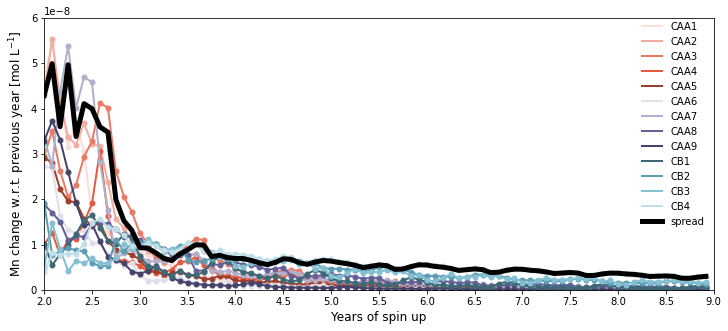

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(12,5))

nruns  = 7 # number of runs
months = range(12 +1, 12*nruns +1)
years  = np.linspace(2, 2+nruns, nruns*12 + 1)[0:-1]
differences = np.empty((len(name),len(years)))

for stn in range(0,len(name)):
    differences[stn,:] = np.concatenate([diff1[stn,:], diff2[stn,:], diff3[stn,:], diff4[stn,:], \
                                         diff5[stn,:], diff6[stn,:], diff7[stn,:]])
    ax.plot(years, differences[stn,:], c=colors[stn], label=name[stn], linewidth=2)
    ax.plot(years, differences[stn,:], '.', c=colors[stn], markersize=10)
    
# Line for spread in values
ax.plot(years, np.max(differences,axis=0)-np.min(differences,axis=0), '-k', linewidth=5, label='spread')

ax.set_xlim([2, 2+nruns])
ax.set_ylim([0, 6e-8])
ax.xaxis.set_ticks(np.linspace(2,2+nruns, nruns*2 + 1))
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlabel('Years of spin up', fontsize=12)
ax.set_ylabel(r'Mn change w.r.t. previous year [mol L$^{-1}$]', fontsize=12)
font = matplotlib.font_manager.FontProperties(family='Helvetica', size=10)
ax.legend(bbox_to_anchor=(0.88, 0.2), frameon=False, prop=font)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A8-spin-up-spm.png', bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1-202104/A8-spin-up-spm.svg', bbox_inches='tight', dpi=300, \
            format='svg')